# Data Exploration and Visualization of Predictive Manintenance Data

- Download and read predictive maintenance data. 
- Make Data Exploration by Pandas with all the techniques you know. 
- Make inputation of null values. 
- Plot all data distributions. 
- Make scatterplots of some attributes and all the possible visualizations you know by Matplotlib and Seaborn. 

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [ ]:
import pandas as pd
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

df = pd.read_csv(data_url)

print('failure rate on total devices',len(df[df['Machine failure']==1])/len(df)*100,'%')

display(df.describe())


failure rate on total devices 3.39 %


UDI  Air temperature [K]  ...           OSF          RNF
count  10000.00000         10000.000000  ...  10000.000000  10000.00000
mean    5000.50000           300.004930  ...      0.009800      0.00190
std     2886.89568             2.000259  ...      0.098514      0.04355
min        1.00000           295.300000  ...      0.000000      0.00000
25%     2500.75000           298.300000  ...      0.000000      0.00000
50%     5000.50000           300.100000  ...      0.000000      0.00000
75%     7500.25000           301.500000  ...      0.000000      0.00000
max    10000.00000           304.500000  ...      1.000000      1.00000

[8 rows x 12 columns]

In [ ]:
df.head(5)

UDI Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
0    1     M14860    M                298.1  ...    0    0    0    0
1    2     L47181    L                298.2  ...    0    0    0    0
2    3     L47182    L                298.1  ...    0    0    0    0
3    4     L47183    L                298.2  ...    0    0    0    0
4    5     L47184    L                298.2  ...    0    0    0    0

[5 rows x 14 columns]

In [ ]:
df[df['Machine failure']==1].head(5)

UDI Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
50    51     L47230    L                298.9  ...    0    1    0    0
69    70     L47249    L                298.9  ...    0    1    1    0
77    78     L47257    L                298.8  ...    0    0    0    0
160  161     L47340    L                298.4  ...    0    0    1    0
161  162     L47341    L                298.3  ...    0    0    1    0

[5 rows x 14 columns]

In [ ]:
df.Type = df.Type.apply(lambda x: 'Low' if (x == 'L') else 'Medium' if(x =='M') else 'High')

df.rename(columns={'Type':'Quality','TWF':'tool wear failure','HDF':'heat dissipation failure','PWF':'power failure','OSF':'overstrain failure','RNF':'random failures'},inplace=True)

df['Air temperature [K]']=df['Air temperature [K]'].apply(lambda x: x -273.15)
df['Process temperature [K]']=df['Process temperature [K]'].apply(lambda x: x -273.15)

df.rename(columns={'Air temperature [K]':'Air temp.','Process temperature [K]':'Process temp.'},inplace=True)


df

UDI Product ID  ... overstrain failure  random failures
0         1     M14860  ...                  0                0
1         2     L47181  ...                  0                0
2         3     L47182  ...                  0                0
3         4     L47183  ...                  0                0
4         5     L47184  ...                  0                0
...     ...        ...  ...                ...              ...
9995   9996     M24855  ...                  0                0
9996   9997     H39410  ...                  0                0
9997   9998     M24857  ...                  0                0
9998   9999     H39412  ...                  0                0
9999  10000     M24859  ...                  0                0

[10000 rows x 14 columns]

checking empty values

In [ ]:
print(df.isnull().sum().sum())
df.isna().any().sum()


0


0

showing data by machine failure and quality type 

In [ ]:

x = df[df['Machine failure']==1].groupby('Quality')
y =  df[df['Machine failure']==0].groupby('Quality')


statistic values for Air temp. on device with failures

In [ ]:

air =x['Air temp.']

print('min air temp. on failures by',air.min())
print('average air temp. on failures by',air.mean())
print('max air temp. on failures by',air.max())

print('\n')

air_nf =y['Air temp.']

print('min air temp. on non failures by',air_nf.min())
print('average air temp. on non failures by',air_nf.mean())
print('max air temp. on non failures by',air_nf.max())


min air temp. on failures by Quality
High      23.45
Low       22.45
Medium    22.65
Name: Air temp., dtype: float64
average air temp. on failures by Quality
High      28.002381
Low       27.606596
Medium    28.036747
Name: Air temp., dtype: float64
max air temp. on failures by Quality
High      30.85
Low       31.25
Medium    30.75
Name: Air temp., dtype: float64


min air temp. on non failures by Quality
High      22.35
Low       22.15
Medium    22.15
Name: Air temp., dtype: float64
average air temp. on non failures by Quality
High      26.689511
Low       26.835637
Medium    26.846294
Name: Air temp., dtype: float64
max air temp. on non failures by Quality
High      31.05
Low       31.35
Medium    31.25
Name: Air temp., dtype: float64


In [ ]:
process=x['Process temp.']

print('min process temp. on failures by',process.min())
print('average process temp. on failures by',process.mean())
print('max process temp. on failures by',process.max())

print('\n')

process_nf=y['Process temp.']

print('min process temp. on non failures by',process_nf.min())
print('average process temp. on non failures by',process_nf.mean())
print('max process temp. on non failures by',process_nf.max())

min process temp. on failures by Quality
High      34.25
Low       32.95
Medium    33.15
Name: Process temp., dtype: float64
average process temp. on failures by Quality
High      37.164286
Low       37.098511
Medium    37.252410
Name: Process temp., dtype: float64
max process temp. on failures by Quality
High      40.05
Low       40.55
Medium    40.05
Name: Process temp., dtype: float64


min process temp. on non failures by Quality
High      32.75
Low       32.55
Medium    32.55
Name: Process temp., dtype: float64
average process temp. on non failures by Quality
High      36.767413
Low       36.852671
Medium    36.857859
Name: Process temp., dtype: float64
max process temp. on non failures by Quality
High      40.35
Low       40.65
Medium    40.65
Name: Process temp., dtype: float64


In [ ]:
rot=x['Rotational speed [rpm]']

print('min rotational speed on failures by',rot.min())
print('average rotational speed on failures by',rot.mean())
print('max rotational speed on failures by',rot.max())

print('\n')

rot_nf=y['Rotational speed [rpm]']

print('min rotational speed on non failures by',rot_nf.min())
print('average rotational speed on non failures by',rot_nf.mean())
print('max rotational speed on non failures by',rot_nf.max())

min rotational speed on failures by Quality
High      1271
Low       1181
Medium    1212
Name: Rotational speed [rpm], dtype: int64
average rotational speed on failures by Quality
High      1442.380952
Low       1482.408511
Medium    1550.036145
Name: Rotational speed [rpm], dtype: float64
max rotational speed on failures by Quality
High      2563
Low       2886
Medium    2710
Name: Rotational speed [rpm], dtype: int64


min rotational speed on non failures by Quality
High      1212
Low       1192
Medium    1168
Name: Rotational speed [rpm], dtype: int64
average rotational speed on non failures by Quality
High      1540.195519
Low       1541.795143
Medium    1537.244681
Name: Rotational speed [rpm], dtype: float64
max rotational speed on non failures by Quality
High      2636
Low       2695
Medium    2456
Name: Rotational speed [rpm], dtype: int64


In [ ]:
torq=x['Torque [Nm]']

print('min torque on failures by',torq.min())
print('average torque on failures by',torq.mean())
print('max torque on failures by',torq.max())

print('\n')

torq_nf= y['Torque [Nm]']

print('min torque on non failures by',torq_nf.min())
print('average torque on non failures by',torq_nf.mean())
print('max torque on non failures by',torq_nf.max())

min torque on failures by Quality
High      12.8
Low        3.8
Medium     9.7
Name: Torque [Nm], dtype: float64
average torque on failures by Quality
High      50.876190
Low       50.785106
Medium    48.242169
Name: Torque [Nm], dtype: float64
max torque on failures by Quality
High      72.8
Low       76.6
Medium    76.2
Name: Torque [Nm], dtype: float64


min torque on non failures by Quality
High      12.8
Low       12.6
Medium    13.8
Name: Torque [Nm], dtype: float64
average torque on non failures by Quality
High      39.602240
Low       39.556826
Medium    39.782979
Name: Torque [Nm], dtype: float64
max torque on non failures by Quality
High      67.9
Low       70.0
Medium    67.3
Name: Torque [Nm], dtype: float64


In [ ]:
tw=x['Tool wear [min]']

print('min tool wear on failures by',tw.min())
print('average tool wear on failures by ',tw.mean())
print('max tool wear on failures by',tw.max())

print('\n')

tw_nf=y['Tool wear [min]']

print('min tool wear on non failures by',tw_nf.min())
print('average tool wear on non failures by ',tw_nf.mean())
print('max tool wear on non failures by',tw_nf.max())


min tool wear on failures by Quality
High      20
Low        0
Medium     0
Name: Tool wear [min], dtype: int64
average tool wear on failures by  Quality
High      143.904762
Low       148.889362
Medium    129.289157
Name: Tool wear [min], dtype: float64
max tool wear on failures by Quality
High      246
Low       251
Medium    253
Name: Tool wear [min], dtype: int64


min tool wear on non failures by Quality
High      0
Low       0
Medium    0
Name: Tool wear [min], dtype: int64
average tool wear on non failures by  Quality
High      106.639511
Low       106.727493
Medium    106.645161
Name: Tool wear [min], dtype: float64
max tool wear on non failures by Quality
High      240
Low       246
Medium    241
Name: Tool wear [min], dtype: int64


In [ ]:
f_tot = len(df[df['Machine failure']==1])
print('total failures:',f_tot)
hf = df[(df['Machine failure']==1) & (df['Quality']=='High')]
mf = df[(df['Machine failure']==1) & (df['Quality']=='Medium')]
lf = df[(df['Machine failure']==1) & (df['Quality']=='Low')]

hf_tot = len(hf)
print('high quality total failures:',hf_tot,'->',round(hf_tot/f_tot*100,2),'%')
hf_tw_tot = len(hf[hf['tool wear failure']==1])
hf_hd_tot = len(hf[hf['heat dissipation failure']==1])
hf_pf_tot = len(hf[hf['power failure']==1])
hf_of_tot = len(hf[hf['overstrain failure']==1])
hf_rf_tot = len(hf[hf['random failures']==1])

print('\tof wich from tool wear',hf_tw_tot,'->',round(hf_tw_tot/f_tot*100,2),'%')
print('\tof wich from heat dissipation',hf_hd_tot,'->',round(hf_hd_tot/f_tot*100,2),'%')
print('\tof wich from power failure',hf_pf_tot,'->',round(hf_pf_tot/f_tot*100,2),'%')
print('\tof wich from overstrain failure',hf_of_tot,'->',round(hf_of_tot/f_tot*100,2),'%')
print('\tof wich from random failures',hf_rf_tot,'->',round(hf_rf_tot/f_tot*100,2),'%')

mf_tot = len(mf)
print('\nmedium quality total failures:',mf_tot,'->',round(mf_tot/f_tot*100,2),'%')
mf_tw_tot = len(mf[mf['tool wear failure']==1])
mf_hd_tot = len(mf[mf['heat dissipation failure']==1])
mf_pf_tot = len(mf[mf['power failure']==1])
mf_of_tot = len(mf[mf['overstrain failure']==1])
mf_rf_tot = len(mf[mf['random failures']==1])

print('\tof wich from tool wear',mf_tw_tot,'->',round(mf_tw_tot/f_tot*100,2),'%')
print('\tof wich from heat dissipation',mf_hd_tot,'->',round(mf_hd_tot/f_tot*100,2),'%')
print('\tof wich from power failure',mf_pf_tot,'->',round(mf_pf_tot/f_tot*100,2),'%')
print('\tof wich from overstrain failure',mf_of_tot,'->',round(mf_of_tot/f_tot*100,2),'%')
print('\tof wich from random failures',mf_rf_tot,'->',round(mf_rf_tot/f_tot*100,2),'%')

lf_tot = len(lf)
print('\nlow quality total failures:',lf_tot,'->',round(lf_tot/f_tot*100,2),'%')
lf_tw_tot = len(lf[lf['tool wear failure']==1])
lf_hd_tot = len(lf[lf['heat dissipation failure']==1])
lf_pf_tot = len(lf[lf['power failure']==1])
lf_of_tot = len(lf[lf['overstrain failure']==1])
lf_rf_tot = len(lf[lf['random failures']==1])

print('\tof wich from tool wear',lf_tw_tot,'->',round(lf_tw_tot/f_tot*100,2),'%')
print('\tof wich from heat dissipation',lf_hd_tot,'->',round(lf_hd_tot/f_tot*100,2),'%')
print('\tof wich from power failure',lf_pf_tot,'->',round(lf_pf_tot/f_tot*100,2),'%')
print('\tof wich from overstrain failure',lf_of_tot,'->',round(lf_of_tot/f_tot*100,2),'%')
print('\tof wich from random failures',lf_rf_tot,'->',round(lf_rf_tot/f_tot*100,2),'%')


total failures: 339
high quality total failures: 21 -> 6.19 %
	of wich from tool wear 7 -> 2.06 %
	of wich from heat dissipation 8 -> 2.36 %
	of wich from power failure 5 -> 1.47 %
	of wich from overstrain failure 2 -> 0.59 %
	of wich from random failures 0 -> 0.0 %

medium quality total failures: 83 -> 24.48 %
	of wich from tool wear 14 -> 4.13 %
	of wich from heat dissipation 31 -> 9.14 %
	of wich from power failure 31 -> 9.14 %
	of wich from overstrain failure 9 -> 2.65 %
	of wich from random failures 0 -> 0.0 %

low quality total failures: 235 -> 69.32 %
	of wich from tool wear 25 -> 7.37 %
	of wich from heat dissipation 76 -> 22.42 %
	of wich from power failure 59 -> 17.4 %
	of wich from overstrain failure 87 -> 25.66 %
	of wich from random failures 1 -> 0.29 %


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def failure_type(x):
  if x['tool wear failure'] == 1:
    return 'tool wear'
  if x['heat dissipation failure'] == 1:
    return 'heat dissipation'
  if x['power failure'] == 1:
    return 'power'
  if x['overstrain failure'] == 1:
    return 'overstrain'
  if x['random failures'] == 1:
    return 'random'
  if x['Machine failure'] == 1:
    return 'random'
  return 'none'

df['failure_type']=df.apply(lambda x: failure_type(x),axis=1)
fails = df[df['Machine failure']==1]
no_fails = df[df['Machine failure']==0]

display(df[(df['failure_type']=='random') & (df['Machine failure']==0)])

UDI Product ID Quality  ...  overstrain failure  random failures  failure_type
1221  1222     M16081  Medium  ...                   0                1        random
1302  1303     L48482     Low  ...                   0                1        random
1748  1749     H31162    High  ...                   0                1        random
2072  2073     L49252     Low  ...                   0                1        random
2559  2560     L49739     Low  ...                   0                1        random
3065  3066     M17925  Medium  ...                   0                1        random
3452  3453     H32866    High  ...                   0                1        random
5471  5472     L52651     Low  ...                   0                1        random
5489  5490     L52669     Low  ...                   0                1        random
5495  5496     H34909    High  ...                   0                1        random
5509  5510     L52689     Low  ...                   0                1        random
5553  5554     L52733     Low  ...                   0                1        random
5639  5640     L52819     Low  ...                   0                1        random
6091  6092     L53271     Low  ...                   0                1        random
6913  6914     L54093     Low  ...                   0                1        random
6960  6961     L54140     Low  ...                   0                1        random
7488  7489     L54668     Low  ...                   0                1        random
7868  7869     H37282    High  ...                   0                1        random

[18 rows x 15 columns]

In [ ]:

sns.catplot(x="Quality", y="Air temp.", jitter = False, hue = "heat dissipation failure",  data=fails )
sns.catplot(x="Quality", y="Air temp.", jitter = False, hue = "failure_type", data = fails)

plt.show()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

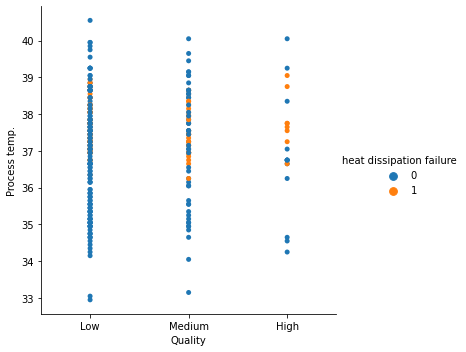

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.catplot(x="Quality", y="Process temp.", jitter = False, hue = "heat dissipation failure",  data=fails )
sns.catplot(x="Quality", y="Process temp.", jitter = False, hue = "failure_type", data = fails)

plt.show()
plt.tight_layout()

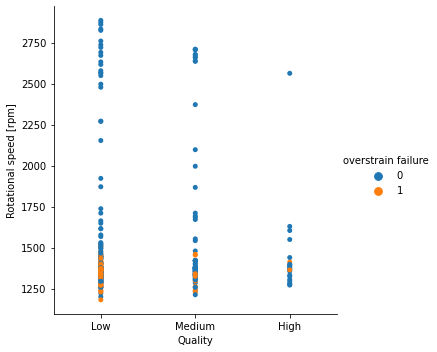

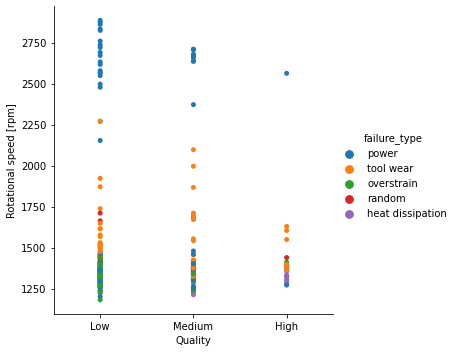

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.catplot(x="Quality", y="Rotational speed [rpm]", jitter = False, hue = "overstrain failure",  data=fails )
sns.catplot(x="Quality", y="Rotational speed [rpm]", jitter = False, hue = "failure_type", data = fails)

plt.show()
plt.tight_layout()

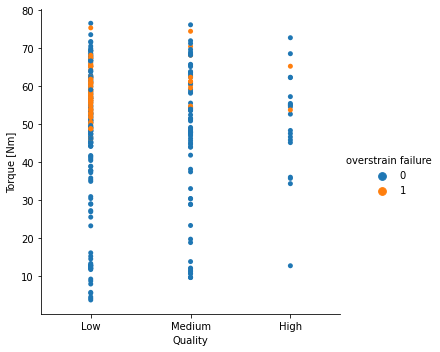

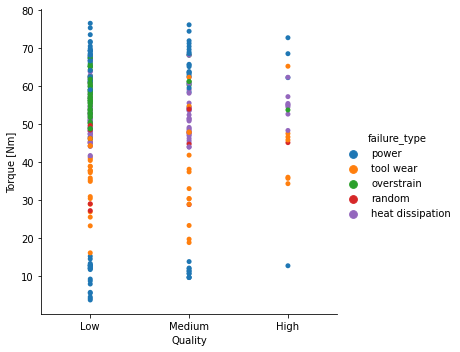

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.catplot(x="Quality", y="Torque [Nm]", jitter = False, hue = "overstrain failure",  data=fails )
sns.catplot(x="Quality", y="Torque [Nm]", jitter = False, hue = "failure_type", data = fails)

plt.show()
plt.tight_layout()

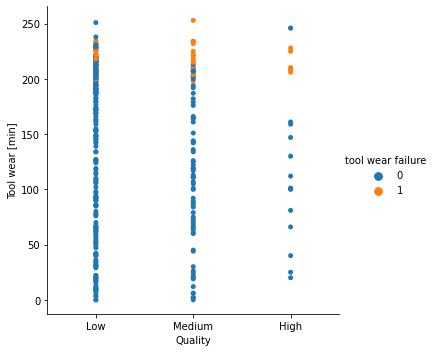

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.catplot(x="Quality", y="Tool wear [min]", jitter = False, hue = "tool wear failure",  data=fails )
sns.catplot(x="Quality", y="Tool wear [min]", jitter = False, hue = "failure_type", data = fails)

plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


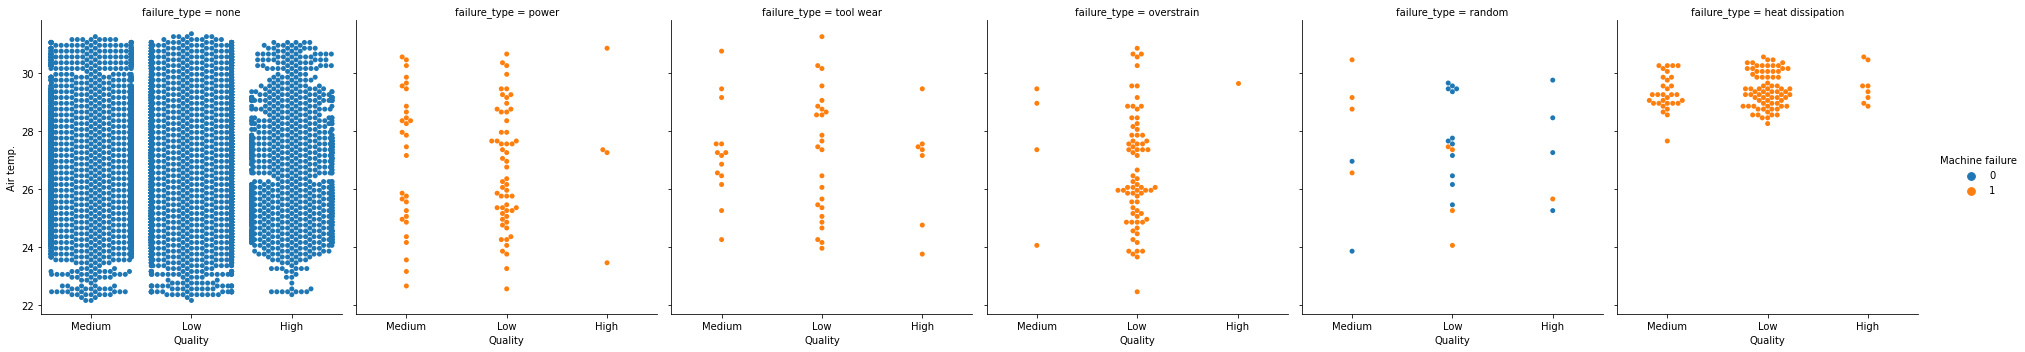

In [ ]:
sns.catplot(x="Quality", y="Air temp.", hue="Machine failure",
            col="failure_type", aspect=0.9,
            kind="swarm", data=df)
plt.show()


In [ ]:
sns.joinplot(x='Air temp.',y=fails['failure_type']=='heat dissipation',data=fails)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


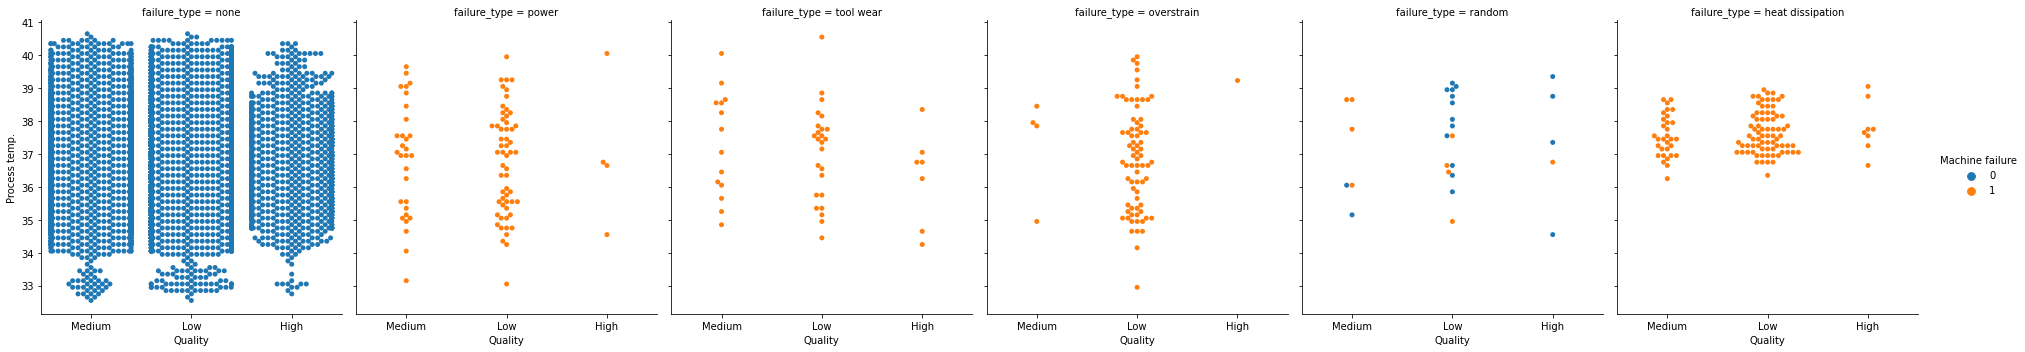

In [ ]:
sns.catplot(x="Quality", y="Process temp.", hue="Machine failure",
            col="failure_type", aspect=0.9,
            kind="swarm", data=df)
plt.show()

In [ ]:
sns.catplot(x="Quality", y="Rotational speed [rpm]", hue="Machine failure",
            col="failure_type", aspect=0.9,
            kind="swarm", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; y

In [ ]:
sns.catplot(x="Quality", y="Torque [Nm]", hue="Machine failure",
            col="failure_type", aspect=0.9,
            kind="swarm", data=df)
plt.show()

NameError: ignored

In [ ]:
sns.catplot(x="Quality", y="Tool wear [min]", hue="Machine failure",
            col="failure_type", aspect=0.9,
            kind="swarm", data=df)
plt.show()

In [ ]:
# print(df.columns)
data = df.loc[:, ~df.columns.isin(['UDI'])]

# print(data.columns)
corrmat = data.corr()

c = data.corr() #.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)

# so = so.unique()

so=so[so!=1]

z = pd.DataFrame(so)
display(z.iloc[:20,:])



0
Air temp.                Process temp.             0.876107
Process temp.            Air temp.                 0.876107
heat dissipation failure Machine failure           0.575800
Machine failure          heat dissipation failure  0.575800
overstrain failure       Machine failure           0.531083
Machine failure          overstrain failure        0.531083
                         power failure             0.522812
power failure            Machine failure           0.522812
tool wear failure        Machine failure           0.362904
Machine failure          tool wear failure         0.362904
Torque [Nm]              Machine failure           0.191321
Machine failure          Torque [Nm]               0.191321
overstrain failure       Torque [Nm]               0.183465
Torque [Nm]              overstrain failure        0.183465
Tool wear [min]          overstrain failure        0.155894
overstrain failure       Tool wear [min]           0.155894
heat dissipation failure Torque [Nm]               0.142610
Torque [Nm]              heat dissipation failure  0.142610
heat dissipation failure Air temp.                 0.137831
Air temp.                heat dissipation failure  0.137831

In [ ]:
display(z.iloc[:-10,:])

0
Air temp.                Process temp.             0.876107
Process temp.            Air temp.                 0.876107
heat dissipation failure Machine failure           0.575800
Machine failure          heat dissipation failure  0.575800
overstrain failure       Machine failure           0.531083
...                                                     ...
Rotational speed [rpm]   random failures          -0.013088
Torque [Nm]              Air temp.                -0.013778
Air temp.                Torque [Nm]              -0.013778
Process temp.            Torque [Nm]              -0.014061
Torque [Nm]              Process temp.            -0.014061

[100 rows x 1 columns]

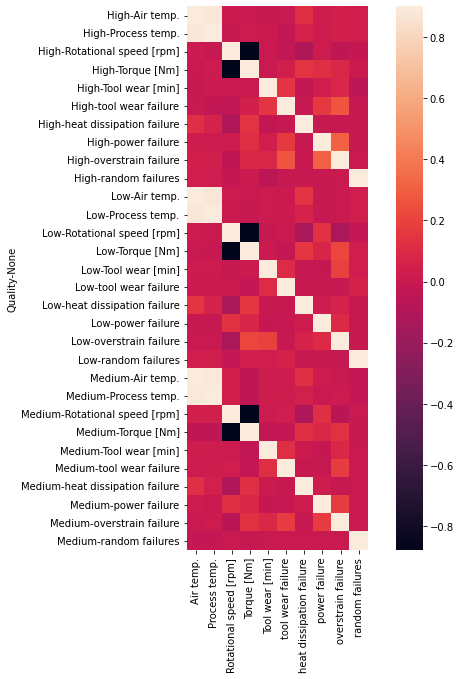

In [ ]:
x=data.loc[:, data.columns.isin(['Quality','Air temp.','Process temp.', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','tool wear failure', 'heat dissipation failure',
       'power failure', 'overstrain failure', 'random failures'])]
# display(x)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.groupby('Quality').corr(), vmax=.9, square=True)
plt.show()

In [ ]:
sns.pairplot(x)
plt.show()

['High']


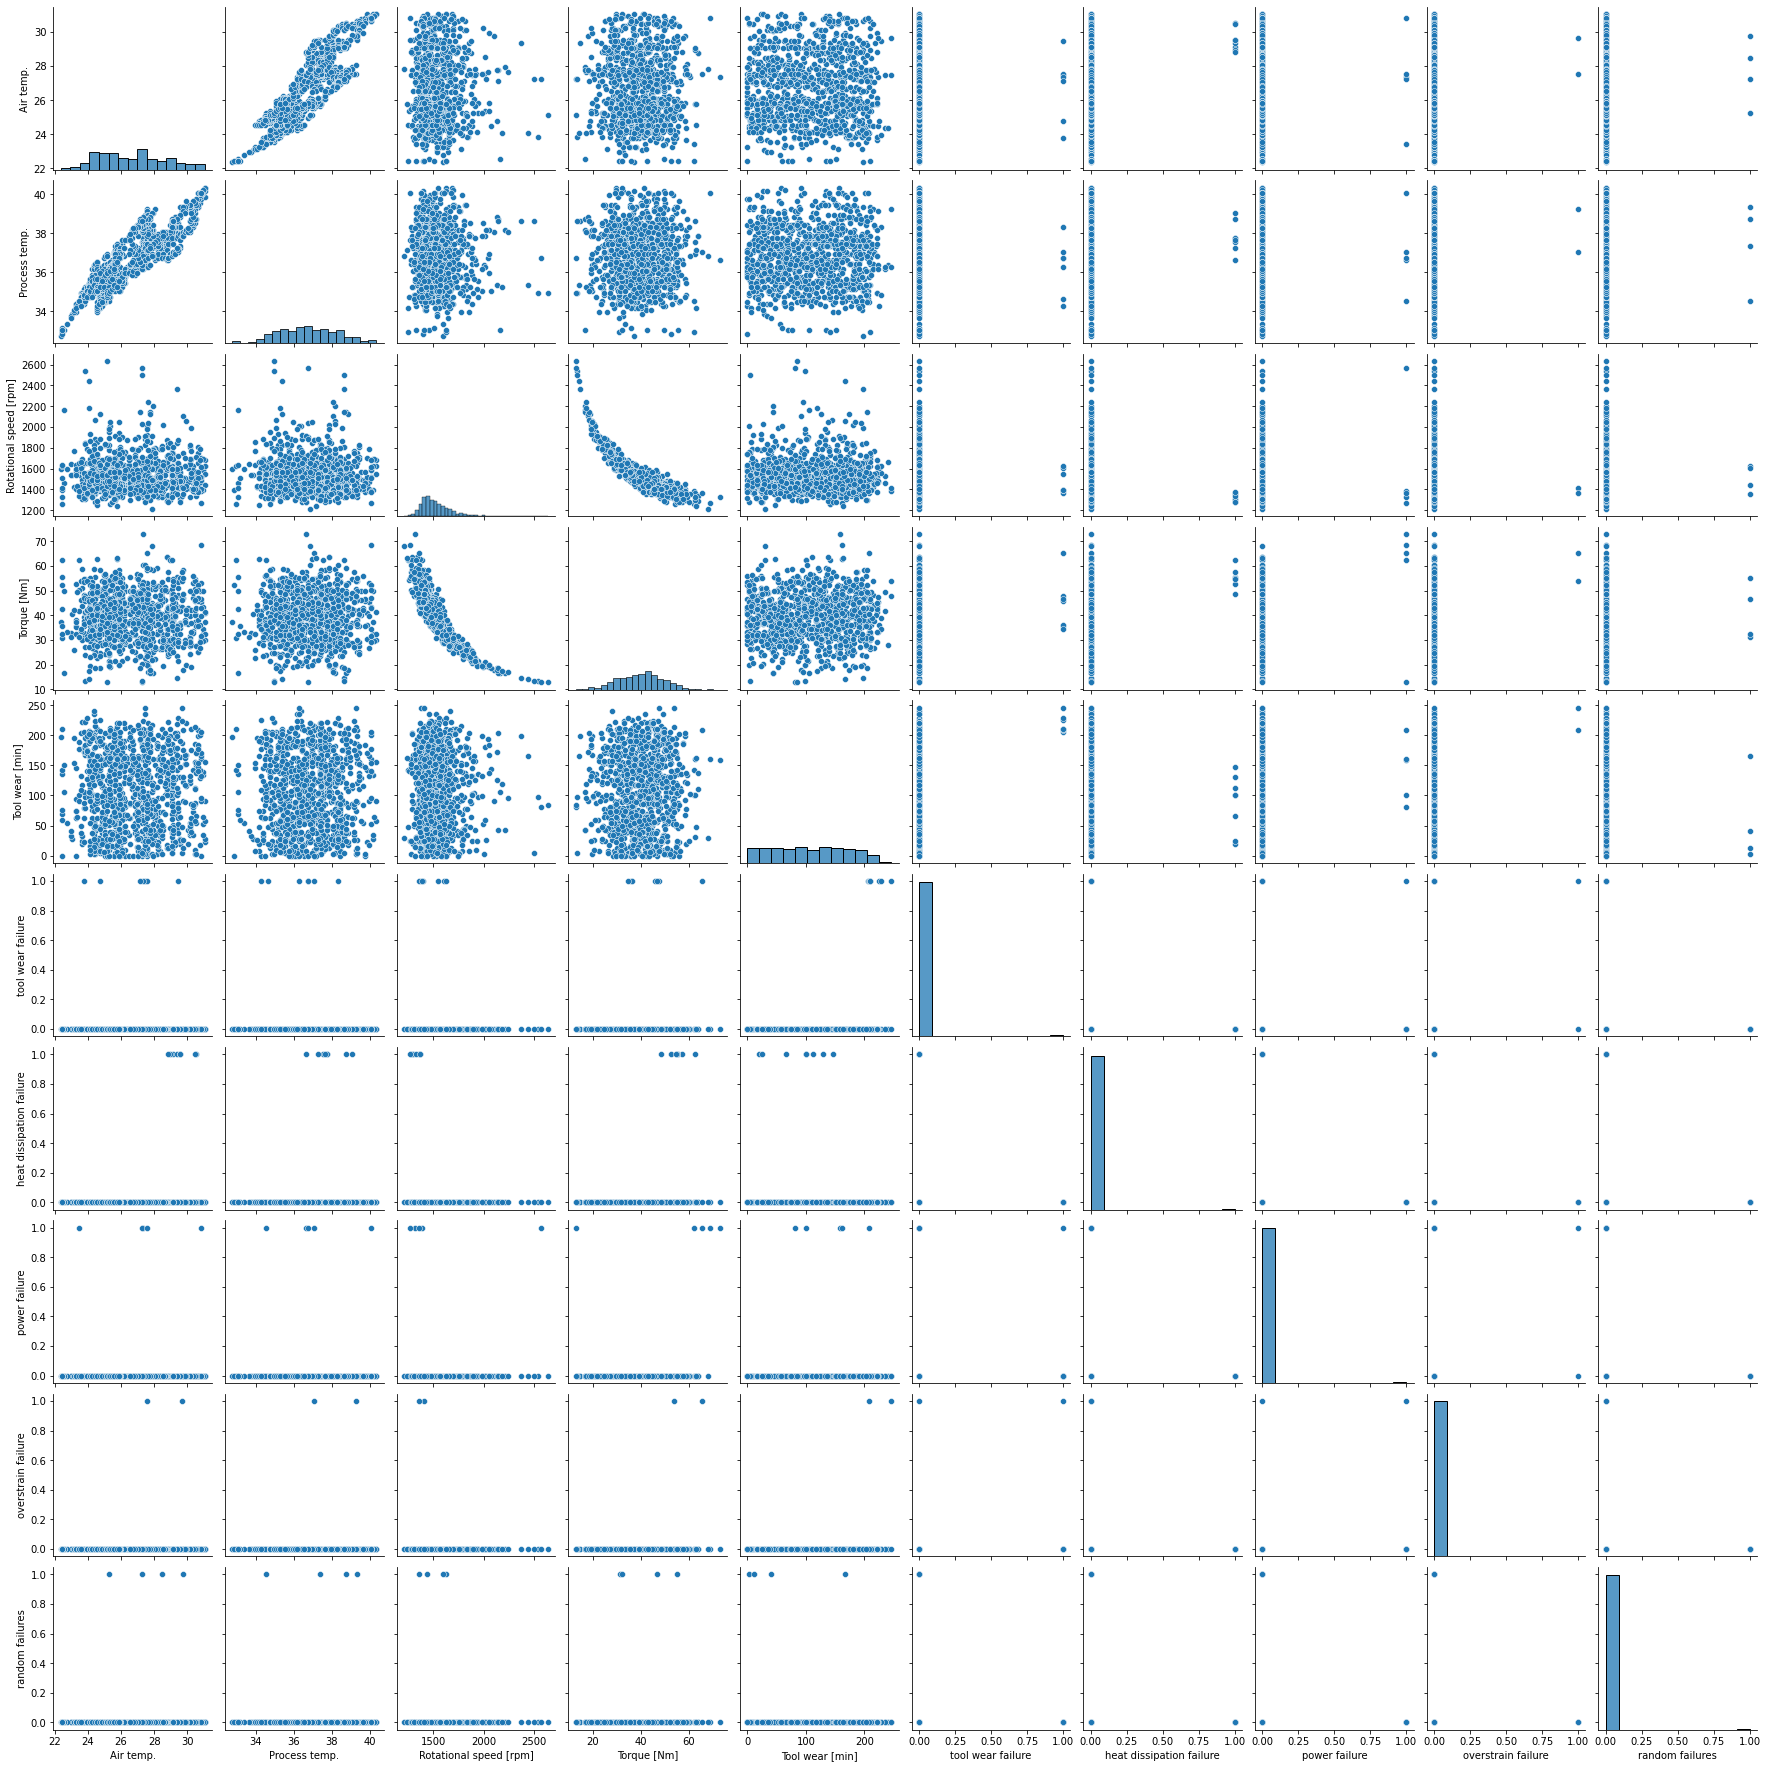

['Low']


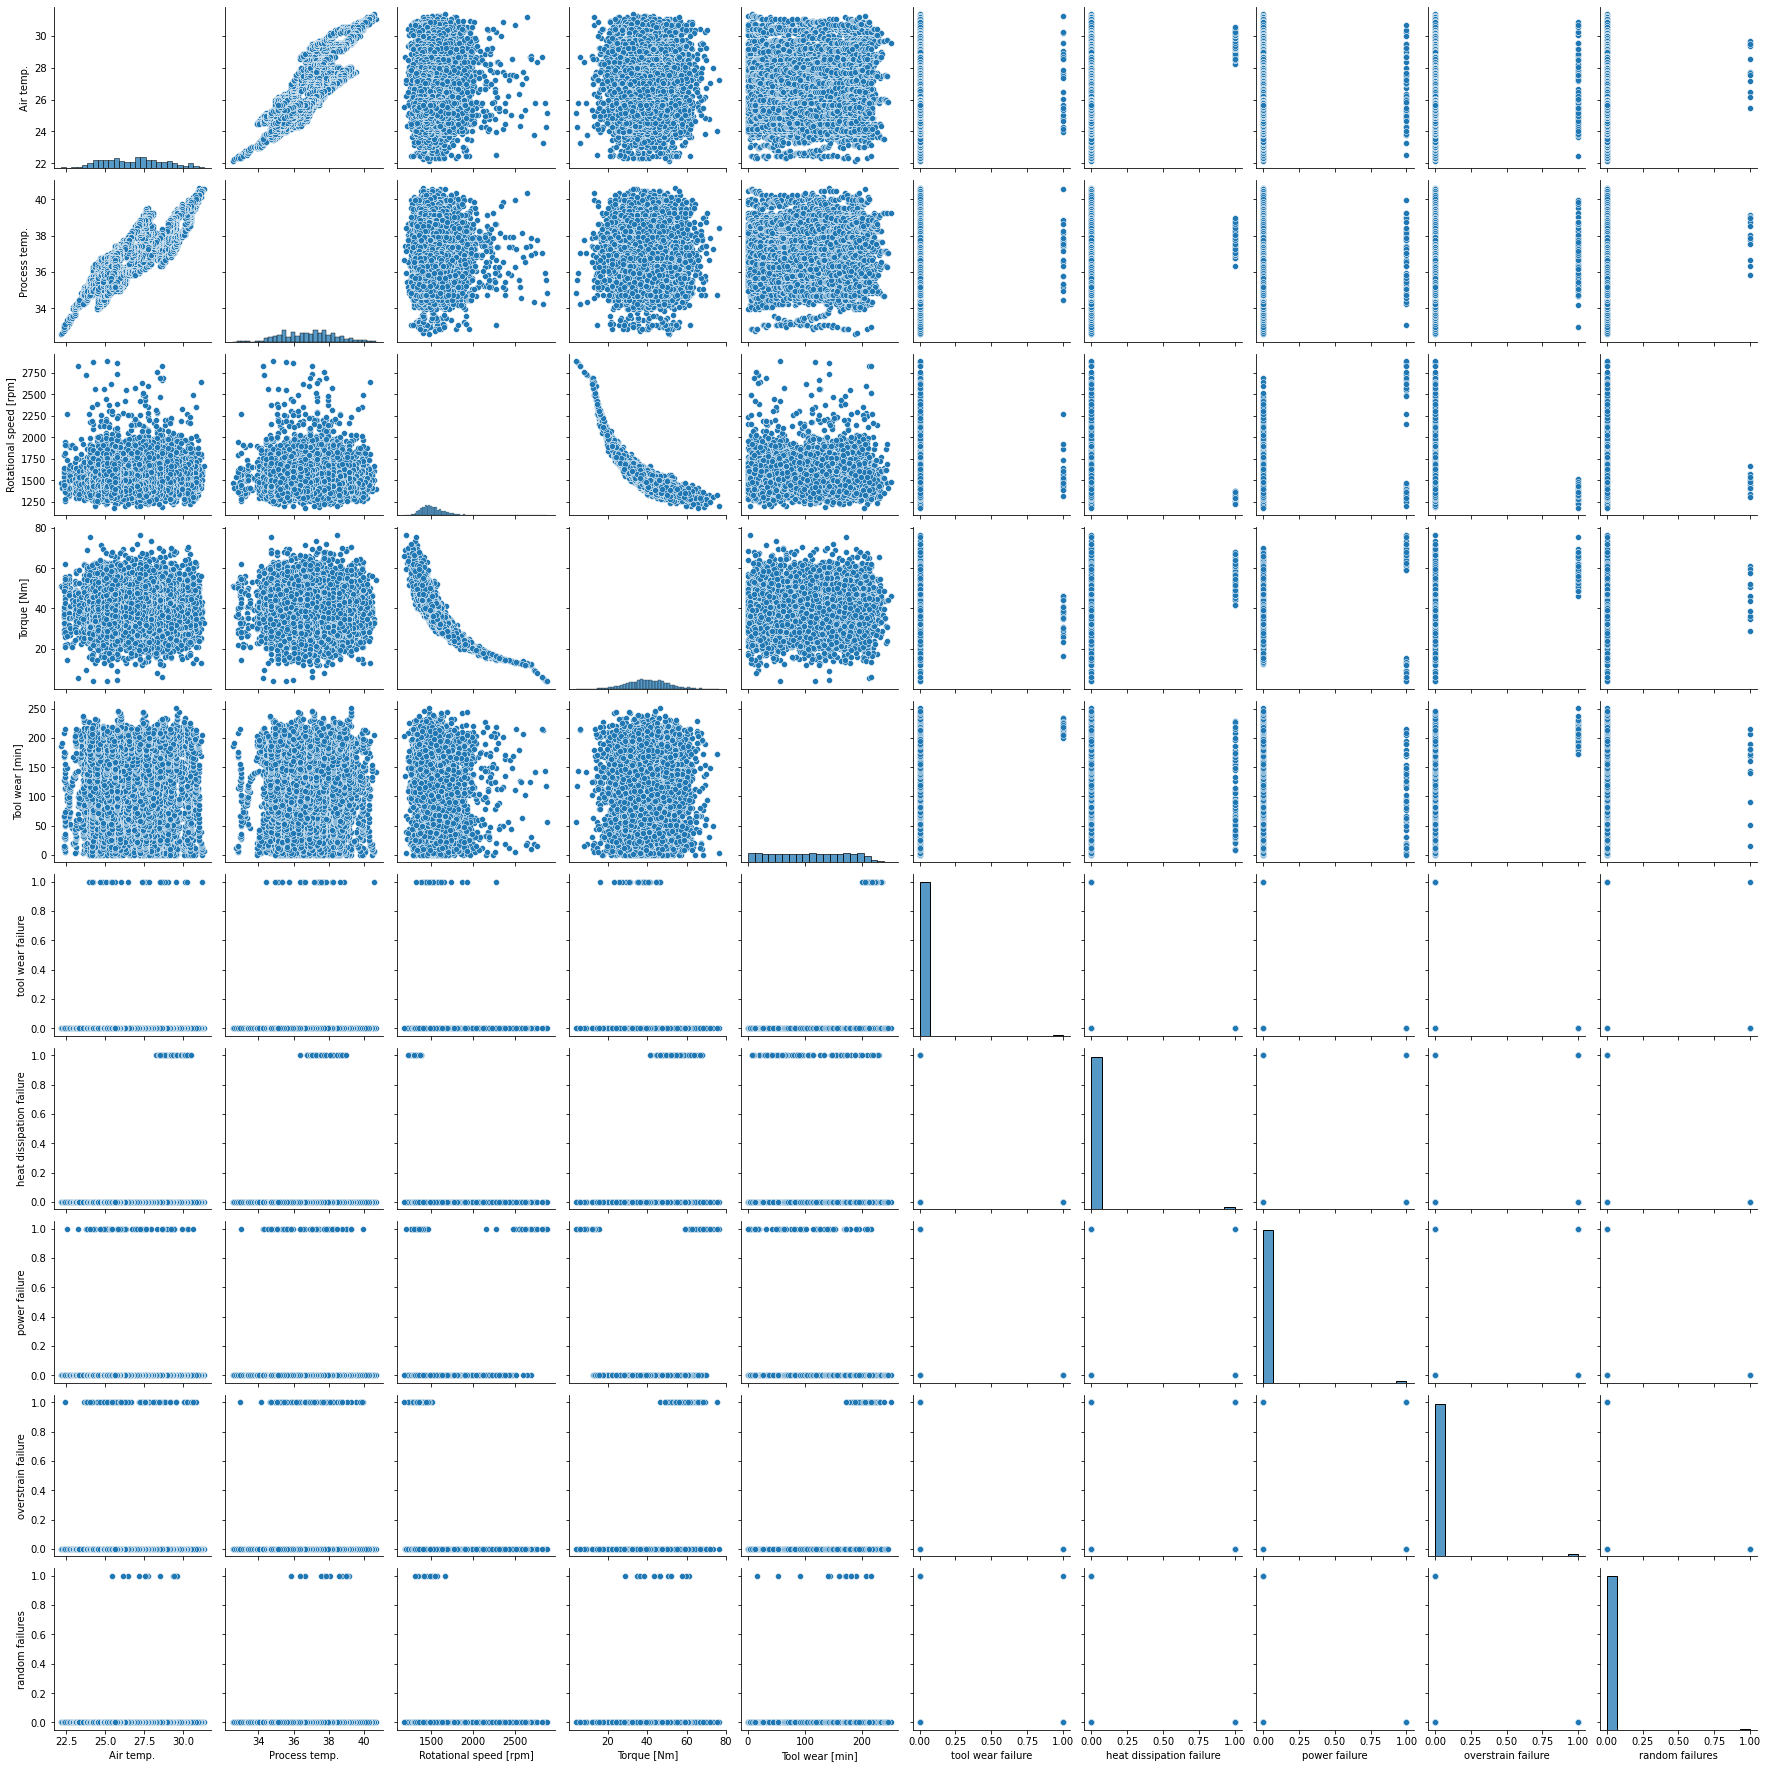

['Medium']


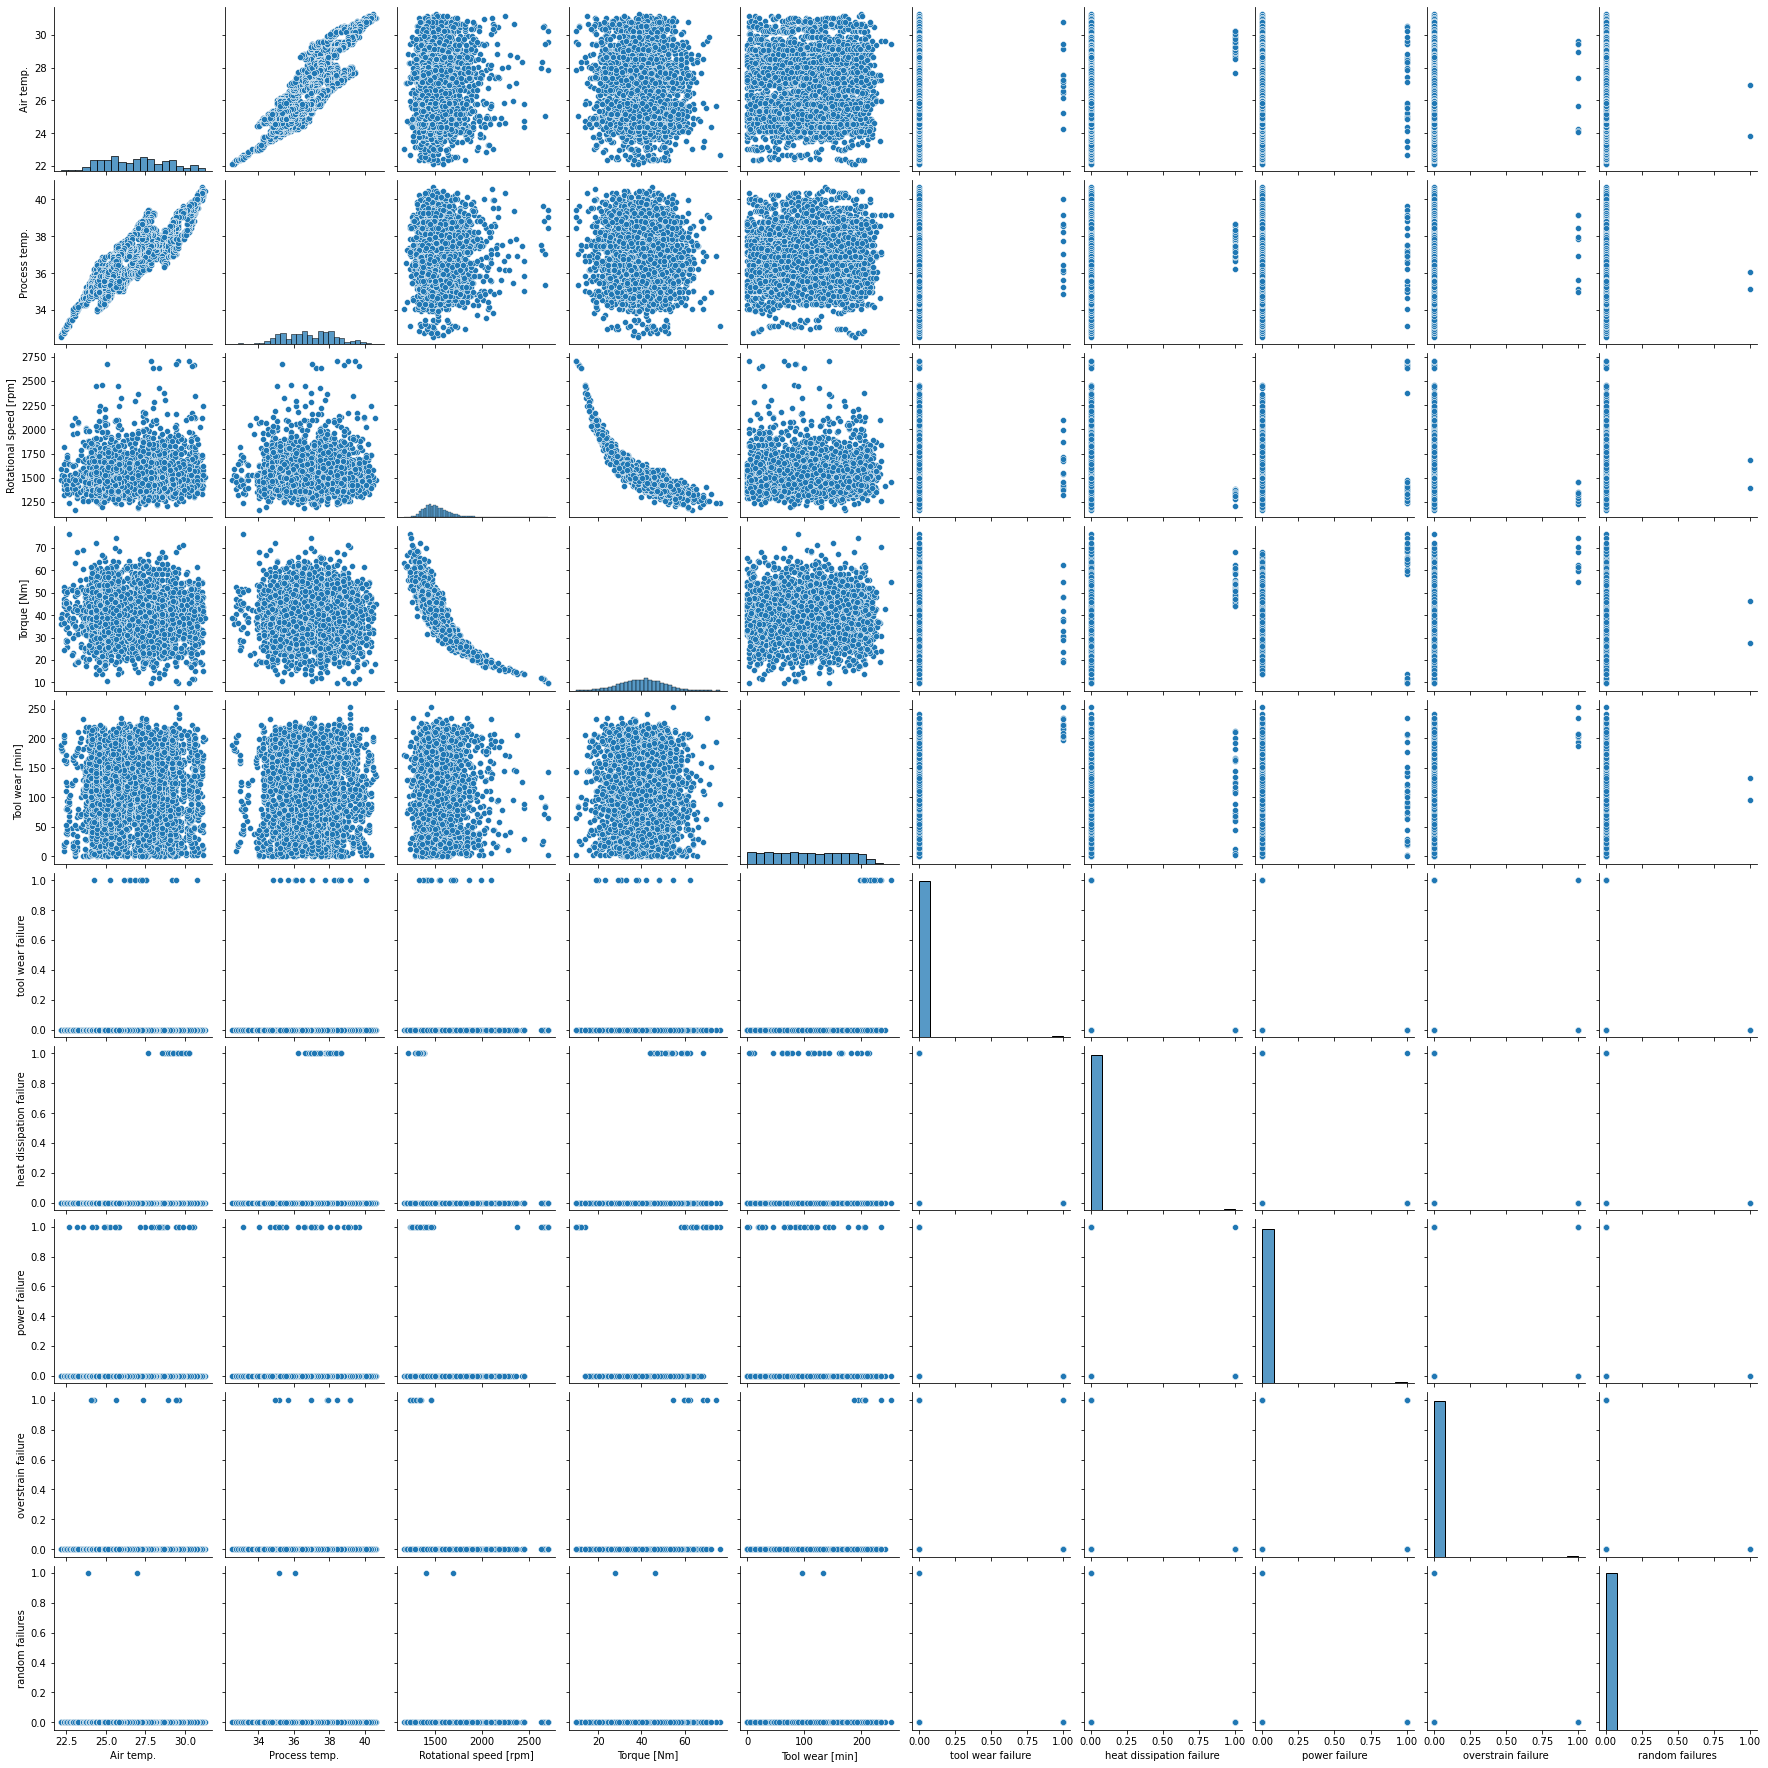

In [ ]:
for i, group in x.groupby('Quality'):
  print(group.Quality.unique())
  sns.pairplot(group)
  plt.show()